<a href="https://colab.research.google.com/github/ameya932/climate_change/blob/main/Climate_Change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
path = "/content/drive/MyDrive/Annual_Surface_Temperature_Change.csv"
df = pd.read_csv(path)

In [6]:
df.describe

<bound method NDFrame.describe of      ObjectId                       Country ISO2 ISO3  \
0           1  Afghanistan, Islamic Rep. of   AF  AFG   
1           2                       Albania   AL  ALB   
2           3                       Algeria   DZ  DZA   
3           4                American Samoa   AS  ASM   
4           5      Andorra, Principality of   AD  AND   
..        ...                           ...  ...  ...   
222       223                Western Sahara   EH  ESH   
223       224                         World  NaN  WLD   
224       225                Yemen, Rep. of   YE  YEM   
225       226                        Zambia   ZM  ZMB   
226       230                      Zimbabwe   ZW  ZWE   

                                             Indicator            Unit  \
0    Temperature change with respect to a baseline ...  Degree Celsius   
1    Temperature change with respect to a baseline ...  Degree Celsius   
2    Temperature change with respect to a baseline ...  Deg

In [7]:
df.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.234,1.308,0.457,1.101,1.607,1.568,1.580,0.960,0.544,1.421
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.568,1.444,1.322,1.665,1.601,1.269,2.146,1.823,1.623,1.682
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.128,1.173,1.676,1.101,1.736,1.498,1.211,1.094,1.913,2.317
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.646,0.883,0.554,0.394,0.924,0.820,0.574,0.924,0.815,0.653
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.196,0.757,1.857,1.546,1.830,1.771,1.761,1.813,2.401,1.367


In [8]:
df.tail()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021
222,223,Western Sahara,EH,ESH,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.234,1.282,1.244,1.277,1.636,2.078,0.851,1.430,2.026,1.557
223,224,World,NaN,WLD,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.058,1.007,1.042,1.406,1.658,1.424,1.284,1.449,1.713,1.442
224,225,"Yemen, Rep. of",YE,YEM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225,226,Zambia,ZM,ZMB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.926,0.746,0.638,1.486,1.474,0.721,0.727,1.295,1.252,1.002
226,230,Zimbabwe,ZW,ZWE,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.329,0.102,-0.008,0.808,1.051,0.116,0.405,0.939,0.415,-0.101


In [9]:
df.columns

Index(['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
       'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'F1961', 'F1962',
       'F1963', 'F1964', 'F1965', 'F1966', 'F1967', 'F1968', 'F1969', 'F1970',
       'F1971', 'F1972', 'F1973', 'F1974', 'F1975', 'F1976', 'F1977', 'F1978',
       'F1979', 'F1980', 'F1981', 'F1982', 'F1983', 'F1984', 'F1985', 'F1986',
       'F1987', 'F1988', 'F1989', 'F1990', 'F1991', 'F1992', 'F1993', 'F1994',
       'F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 'F2001', 'F2002',
       'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009', 'F2010',
       'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018',
       'F2019', 'F2020', 'F2021'],
      dtype='object')

In [10]:
df = df.drop(['ObjectId', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source', 'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor'], axis = 1)

In [11]:
df.isnull().sum()

Country     0
F1961      36
F1962      35
F1963      36
F1964      37
           ..
F2017      13
F2018      11
F2019      12
F2020      13
F2021      13
Length: 62, dtype: int64

In [12]:
columns = df[['F1961', 'F1962', 'F1963', 'F1964', 'F1965', 'F1966', 'F1967', 'F1968', 'F1969', 'F1970',
            'F1971', 'F1972', 'F1973', 'F1974', 'F1975', 'F1976', 'F1977', 'F1978', 'F1979', 'F1980',
            'F1981', 'F1982', 'F1983', 'F1984', 'F1985', 'F1986', 'F1987', 'F1988', 'F1989', 'F1990',
            'F1991', 'F1992', 'F1993', 'F1994', 'F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000',
            'F2001', 'F2002', 'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009', 'F2010',
            'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019', 'F2020',
            'F2021']]

for col in columns:
    df[col] = df[col].fillna(df[col].mean())

In [13]:
df.isnull().sum()

Country    0
F1961      0
F1962      0
F1963      0
F1964      0
          ..
F2017      0
F2018      0
F2019      0
F2020      0
F2021      0
Length: 62, dtype: int64

In [14]:
print(df.describe())

            F1961       F1962       F1963       F1964       F1965       F1966  \
count  227.000000  227.000000  227.000000  227.000000  227.000000  227.000000   
mean     0.157152   -0.018589   -0.009361   -0.084511   -0.250305    0.110010   
std      0.371746    0.318027    0.349912    0.282529    0.243206    0.357155   
min     -0.745000   -0.910000   -1.273000   -0.876000   -1.060000   -1.793000   
25%     -0.069000   -0.154500   -0.162000   -0.213500   -0.364000   -0.014000   
50%      0.118000   -0.040000   -0.009361   -0.084511   -0.250305    0.110010   
75%      0.237000    0.070500    0.160500    0.070500   -0.131500    0.227000   
max      1.906000    1.057000    1.204000    1.100000    0.856000    1.421000   

            F1967       F1968       F1969       F1970  ...       F2012  \
count  227.000000  227.000000  227.000000  227.000000  ...  227.000000   
mean    -0.118010   -0.197230    0.154440    0.097689  ...    0.887421   
std      0.318301    0.253531    0.276924    0.3

In [19]:
# Calculating mean temperature of each country
country_mean = df.iloc[:, 1:62].mean()
print(country_mean)

F1961    0.157152
F1962   -0.018589
F1963   -0.009361
F1964   -0.084511
F1965   -0.250305
           ...   
F2017    1.269939
F2018    1.288102
F2019    1.427628
F2020    1.538565
F2021    1.317009
Length: 61, dtype: float64


In [20]:
# Calculating global mean temperature change
global_mean = country_mean.mean()
print("Global mean temperature change = ", global_mean)

Global mean temperature change =  0.49524111120068665


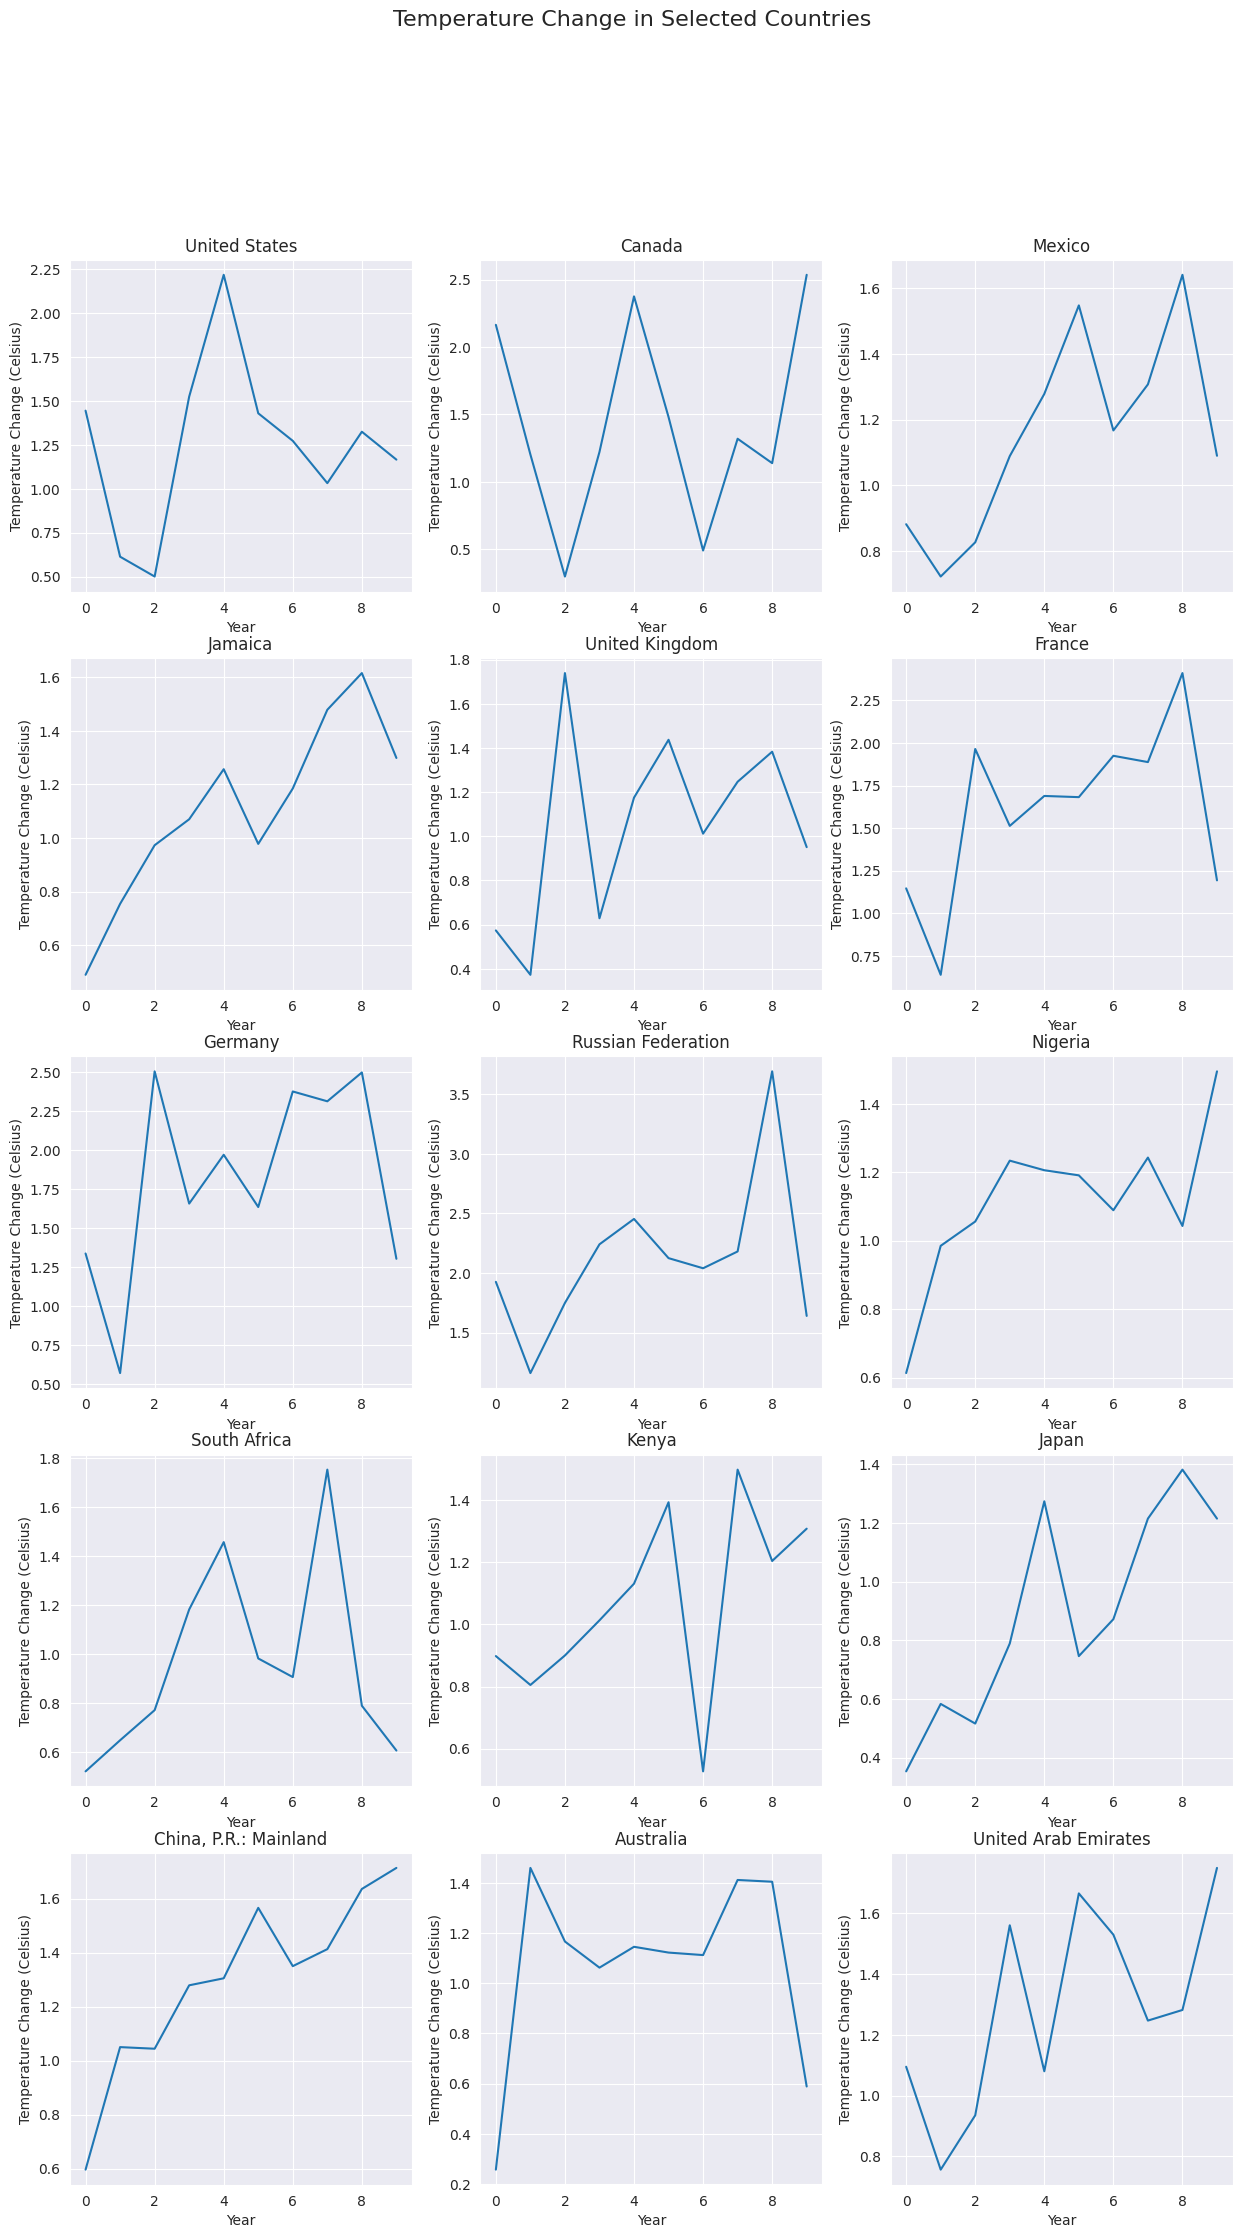

In [27]:
country_list = ['United States', 'Canada', 'Mexico', 'Jamaica', 'United Kingdom', 'France', 'Germany', 'Russian Federation', 'Nigeria',
                'South Africa', 'Kenya', 'Japan', 'China, P.R.: Mainland', 'Australia', 'United Arab Emirates']

fig, axes = plt.subplots(5, 3, figsize=(15, 25))
fig.suptitle('Temperature Change in Selected Countries', fontsize=16)

for i, country in enumerate(country_list):
    row = i // 3
    col = i % 3
    axes[row, col].plot(df.loc[df['Country'] == country][['F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017',
                                                        'F2018', 'F2019', 'F2020', 'F2021']].values[0])
    axes[row, col].set_title(country)
    axes[row, col].set_xlabel('Year')
    axes[row, col].set_ylabel('Temperature Change (Celsius)')
    
plt.show()

In [28]:
df = df.T
df.head()

,0,1,2,3,4,5,6,7,8,9,...,217,218,219,220,221,222,223,224,225,226
Country,"Afghanistan, Islamic Rep. of",Albania,Algeria,American Samoa,"Andorra, Principality of",Angola,Anguilla,Antigua and Barbuda,Argentina,"Armenia, Rep. of",...,Vanuatu,"Venezuela, Rep. Bolivariana de",Vietnam,Wallis and Futuna Islands,West Bank and Gaza,Western Sahara,World,"Yemen, Rep. of",Zambia,Zimbabwe
F1961,-0.105,0.627,0.162,0.066,0.744,0.051,0.104,0.112,0.128,0.157152,...,0.197,0.038,0.002,0.323,-0.165,0.619,0.207,0.033,0.22,0.253
F1962,-0.157,0.33,0.131,-0.055,0.102,-0.145,-0.091,-0.084,-0.03,-0.018589,...,0.109,-0.12,-0.248,-0.051,0.731,0.559,0.037,-0.006,-0.177,0.233
F1963,0.852,0.068,0.11,0.16,-0.762,-0.186,0.153,0.185,0.175,-0.009361,...,-0.158,-0.014,-0.309,0.125,0.809,0.323,0.167,0.164,-0.397,-0.46
F1964,-0.743,-0.172,0.284,-0.15,0.3,-0.228,0.128,0.109,-0.345,-0.084511,...,0.217,0.043,0.08,0.187,-0.654,0.811,-0.252,-0.254,-0.29,-0.101


In [29]:
df.rename(columns = df.iloc[0], inplace = True)
df.head()

,"Afghanistan, Islamic Rep. of",Albania,Algeria,American Samoa,"Andorra, Principality of",Angola,Anguilla,Antigua and Barbuda,Argentina,"Armenia, Rep. of",...,Vanuatu,"Venezuela, Rep. Bolivariana de",Vietnam,Wallis and Futuna Islands,West Bank and Gaza,Western Sahara,World,"Yemen, Rep. of",Zambia,Zimbabwe
Country,"Afghanistan, Islamic Rep. of",Albania,Algeria,American Samoa,"Andorra, Principality of",Angola,Anguilla,Antigua and Barbuda,Argentina,"Armenia, Rep. of",...,Vanuatu,"Venezuela, Rep. Bolivariana de",Vietnam,Wallis and Futuna Islands,West Bank and Gaza,Western Sahara,World,"Yemen, Rep. of",Zambia,Zimbabwe
F1961,-0.105,0.627,0.162,0.066,0.744,0.051,0.104,0.112,0.128,0.157152,...,0.197,0.038,0.002,0.323,-0.165,0.619,0.207,0.033,0.22,0.253
F1962,-0.157,0.33,0.131,-0.055,0.102,-0.145,-0.091,-0.084,-0.03,-0.018589,...,0.109,-0.12,-0.248,-0.051,0.731,0.559,0.037,-0.006,-0.177,0.233
F1963,0.852,0.068,0.11,0.16,-0.762,-0.186,0.153,0.185,0.175,-0.009361,...,-0.158,-0.014,-0.309,0.125,0.809,0.323,0.167,0.164,-0.397,-0.46
F1964,-0.743,-0.172,0.284,-0.15,0.3,-0.228,0.128,0.109,-0.345,-0.084511,...,0.217,0.043,0.08,0.187,-0.654,0.811,-0.252,-0.254,-0.29,-0.101


In [32]:
df = df.drop(df.index[0])
df = df.reset_index()
df.head()

,level_0,index,"Afghanistan, Islamic Rep. of",Albania,Algeria,American Samoa,"Andorra, Principality of",Angola,Anguilla,Antigua and Barbuda,...,Vanuatu,"Venezuela, Rep. Bolivariana de",Vietnam,Wallis and Futuna Islands,West Bank and Gaza,Western Sahara,World,"Yemen, Rep. of",Zambia,Zimbabwe
0,1,F1963,0.852,0.068,0.11,0.16,-0.762,-0.186,0.153,0.185,...,-0.158,-0.014,-0.309,0.125,0.809,0.323,0.167,0.164,-0.397,-0.46
1,2,F1964,-0.743,-0.172,0.284,-0.15,0.3,-0.228,0.128,0.109,...,0.217,0.043,0.08,0.187,-0.654,0.811,-0.252,-0.254,-0.29,-0.101
2,3,F1965,-0.211,-0.393,-0.081,-0.582,-0.492,-0.207,-0.364,-0.415,...,-0.549,-0.146,0.007,-0.41,-0.054,-0.342,-0.225,-0.628,-0.421,-0.476
3,4,F1966,0.156,0.553,0.436,0.166,0.407,0.162,-0.006,0.07,...,-0.258,0.158,0.491,0.048,0.591,0.295,0.201,0.083,0.291,0.211
4,5,F1967,-0.389,-0.08,0.006,-0.364,0.621,-0.088,-0.259,-0.222,...,-0.107,-0.215,-0.119,-0.255,-0.933,0.013,-0.116,-0.262,-0.013,-0.051


In [33]:
df.rename(columns={'index':'Year'}, inplace=True)
df.tail()

,level_0,Year,"Afghanistan, Islamic Rep. of",Albania,Algeria,American Samoa,"Andorra, Principality of",Angola,Anguilla,Antigua and Barbuda,...,Vanuatu,"Venezuela, Rep. Bolivariana de",Vietnam,Wallis and Futuna Islands,West Bank and Gaza,Western Sahara,World,"Yemen, Rep. of",Zambia,Zimbabwe
54,55,F2017,1.568,1.269,1.498,0.82,1.771,1.064,0.98,0.965,...,1.032,0.752,1.213,0.96,0.821,2.078,1.424,1.269939,0.721,0.116
55,56,F2018,1.58,2.146,1.211,0.574,1.761,1.504,0.728,0.694,...,0.445,0.808,0.905,0.688,2.093,0.851,1.284,1.288102,0.727,0.405
56,57,F2019,0.96,1.823,1.094,0.924,1.813,1.975,0.861,0.806,...,0.803,1.171,1.864,1.11,1.298,1.43,1.449,1.427628,1.295,0.939
57,58,F2020,0.544,1.623,1.913,0.815,2.401,1.387,1.246,1.141,...,1.146,1.293,1.588,1.082,1.553,2.026,1.713,1.538565,1.252,0.415
58,59,F2021,1.421,1.682,2.317,0.653,1.367,1.631,0.91,0.873,...,1.067,0.723,1.193,0.775,1.887,1.557,1.442,1.317009,1.002,-0.101
